# Import

In [1]:
!pip install spotipy

In [5]:
client_id = %env CLIENT_ID
client_secret = %env CLIENT_SECRET

In [150]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Set Credentials

In [7]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

## Import the dataset

In [8]:
!pwd

/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/notebooks


In [9]:
new_songs = pd.read_csv('/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/raw_data/spotify_dataset.csv')

data = pd.read_csv('/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/raw_data/final_dataset_2.csv')

/tmp/ipykernel_20044/1769579537.py:3: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/raw_data/final_dataset_2.csv')


In [10]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,id_artists,followers,genres,artist_popularity,preview_url,cover_album
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,1922-02-22,0.645,0.44500,0,...,0.744,0.1510,0.127,104.851,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,Uli,1922-02-22,0.298,0.46000,1,...,0.856,0.4360,0.402,87.921,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,Uli,1922-02-22,0.634,0.00399,5,...,0.919,0.1050,0.396,79.895,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,Uli,1922-02-22,0.657,0.32500,10,...,0.856,0.0931,0.105,81.944,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,Uli,1922-02-22,0.644,0.68400,7,...,0.802,0.0847,0.138,100.031,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN


In [67]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [11]:
new_songs.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [158]:
new_songs['popularity'].unique()

array(['100', '99', '98', '96', '97', '94', '95', '89', '93', '90', '91',
       '92', '85', '88', ' ', '86', '84', '49', '83', '87', '0', '80',
       '78', '2', '79', '82', '72', '77', '67', '74', '81', '75', '71',
       '57', '56', '55', '54', '53', '76', '73', '70', '69', '66', '65',
       '64', '63', '68', '1', '61', '58', '59', '50', '51', '48', '47',
       '42', '45', '43', '46', '44', '41', '38', '36', '60', '29', '52',
       '62', '34', '15', '3'], dtype=object)

In [17]:
for col in new_songs.columns:
    new_songs.rename(columns={col: col.lower()}, inplace=True)

In [18]:
new_songs.columns

Index(['index', 'highest charting position', 'number of times charted',
       'week of highest charting', 'song name', 'streams', 'artist',
       'artist followers', 'song id', 'genre', 'release date', 'weeks charted',
       'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'tempo', 'duration (ms)', 'valence',
       'chord'],
      dtype='object')

In [20]:
for col in data.columns:
    if col not in new_songs.columns:
        print(col)

id
name
duration_ms
explicit
artists
release_date
key
mode
instrumentalness
id_artists
followers
genres
artist_popularity
preview_url
cover_album


In [22]:
for col in new_songs.columns:
    if col not in data.columns:
        print(col)

index
highest charting position
number of times charted
week of highest charting
song name
streams
artist
artist followers
song id
genre
release date
weeks charted
duration (ms)
chord


In [37]:
def playlist_to_df(pl_id: str):
    
    
    response = sp.playlist(pl_id)
    if not response:
        print("error with response")
        return None
    
    # Saving the basic features
    name = [response['tracks']['items'][i]['track']['name'] for i in range(len(response['tracks']['items']))]
    artist = [response['tracks']['items'][i]['track']['artists'][0]['name'] for i in range(len(response['tracks']['items']))]
    artist_id = [response['tracks']['items'][i]['track']['album']['artists'][0]['id'] for i in range(len(response['tracks']['items']))]
    popularity = [response['tracks']['items'][i]['track']['popularity'] for i in range(len(response['tracks']['items']))]
    Id = [response['tracks']['items'][i]['track']['id'] for i in range(len(response['tracks']['items']))]
    release_date = [response['tracks']['items'][i]['track']['album']['release_date'] for i in range(len(response['tracks']['items']))]
    preview_url = [response['tracks']['items'][i]['track']['preview_url'] for i in range(len(response['tracks']['items']))]
    cover_album = [response['tracks']['items'][i]['track']['album']['images'][0]['url'] for i in range(len(response['tracks']['items']))]
    explicit = [response['tracks']['items'][i]['track']['explicit'] for i in range(len(response['tracks']['items']))]
    
    
    data = {}

    # Setting the features
    data['id'] = Id
    data['name'] = name
    data['popularity'] = popularity
    data['artists'] = artist
    data['id_artists'] = artist_id
    data['explicit'] = explicit

    data['release_date'] = release_date
    data['preview_url'] = preview_url
    data['cover_album'] = cover_album

    # turning into dataframe
    df = pd.DataFrame(data)

    #turninge the realise date into datetime
    df['release_date'] = pd.to_datetime(df['release_date'])

    # Turning explicit column in 0 or 1
    df['explicit'] = df['explicit'].map(lambda x: 1 if x == True else 0)
    
    # List of features set
    tracks = []

    # For each track in the 1st dataframe 
    for track_id in df.loc[:,'id']:
        track = f'spotify:track:{track_id}' # Get the track features
        audio_features = sp.audio_features(track) # Save in audio features variable
        tracks.append(audio_features[0]) # Append to the tracks list
        
    # New dataframe with all the tracks in the first dataframe
    df_features =  pd.DataFrame(tracks)
    
    data = df.merge(df_features, on='id')

    # Dropping columns not needed
    data.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis=1, inplace=True)
    
    return data    

In [56]:
def get_followers(df: pd.DataFrame):
    
    # Creating the dataframe base with a dict
    artista = {'id_artists': [], 'genres': [], 'followers': [], 'artist_popularity': []}

    # For each artist id get the id, genre and followers and append to the dict
    for _id in df['id_artists']:
        artist = sp.artist(_id)
        artista['id_artists'].append(artist['id'])
        artista['genres'].append(artist['genres'])
        artista['followers'].append(artist['followers']['total'])
        artista['artist_popularity'].append(artist['popularity'])
    
    new_df = pd.DataFrame(artista)
    new_df['genres'] = new_df['genres'].apply(lambda x: ', '.join(map(str, x)))
    
    data = df.merge(new_df, on='id_artists')
    print('Okay, all done!')
    return data.drop_duplicates()

In [115]:
df = playlist_to_df('37i9dQZF1DX9OB4XLtWNko')

In [116]:
df.shape

(80, 20)

In [117]:
df = df[df['popularity'] > 70]

In [118]:
df.shape

(80, 20)

In [119]:
d = get_followers(df)

Okay, all done!


In [120]:
d

,id,name,popularity,artists,id_artists,explicit,release_date,preview_url,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres,followers,artist_popularity
0,68Dni7IE4VyPkTOH9mRWHr,No Role Modelz,88,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,1,2014-12-09,None,0.690,0.521,...,0.3390,0.32400,0.000000,0.0534,0.494,100.028,292799,"conscious hip hop, hip hop, north carolina hip...",19613080,88
2,2JvzF1RMd7lE3KmFlsyZD8,MIDDLE CHILD,81,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,1,2019-01-23,None,0.837,0.364,...,0.2760,0.14900,0.000000,0.2710,0.463,123.984,213594,"conscious hip hop, hip hop, north carolina hip...",19613080,88
4,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),88,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,0,2018-04-19,None,0.351,0.296,...,0.0333,0.93400,0.000000,0.0950,0.120,115.284,200186,"art pop, electropop, pop",78249366,89
6,2Fxmhks0bxGSBdJ92vM42m,bad guy,82,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,0,2019-03-29,None,0.701,0.425,...,0.3750,0.32800,0.130000,0.1000,0.562,135.128,194088,"art pop, electropop, pop",78249366,89
8,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,88,Harry Styles,6KImCVD70vtIoJWnq6nGn3,0,2019-12-13,https://p.scdn.co/mp3-preview/824cd58da2e9a15e...,0.548,0.816,...,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,pop,26743091,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,08bNPGLD8AhKpnnERrAc6G,FRIENDS,77,Marshmello,64KEffDW9EtZ1y2vBYgq8T,1,2018-02-09,https://p.scdn.co/mp3-preview/6245dd62009fbbe6...,0.626,0.880,...,0.0504,0.20500,0.000000,0.1280,0.534,95.079,202621,"brostep, dance pop, edm, pop, pop dance, progr...",34962597,85
166,0Aqi7ArnBrGblW5T6p2jmD,Falling,77,Trevor Daniel,7uaIm6Pw7xplS8Dy06V6pT,0,2020-03-26,https://p.scdn.co/mp3-preview/0d911f7650ed127f...,0.785,0.431,...,0.0364,0.12300,0.000000,0.0887,0.236,127.085,159382,"melodic rap, pop, pop rap, viral rap",745143,68
167,0QZ5yyl6B6utIWkxeBDxQN,The Night We Met,77,Lord Huron,6ltzsmQQbmdoHHbLZ4ZN25,0,2015-04-07,https://p.scdn.co/mp3-preview/a8e6c16eb3eafd9b...,0.545,0.366,...,0.0378,0.96900,0.267000,0.6410,0.100,86.997,208212,stomp and holler,1206312,74
168,3Dv1eDb0MEgF93GpLXlucZ,Say So,77,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,1,2019-11-07,https://p.scdn.co/mp3-preview/7131c09d3479d06d...,0.787,0.673,...,0.1590,0.26400,0.000003,0.0904,0.779,110.962,237893,"dance pop, pop",24880879,88


In [121]:
data = data.merge(d, on=[col for col in d.columns], how='outer').drop_duplicates()

In [122]:
data.shape

(574430, 24)

In [147]:
x = data.drop(data[(data['name'].duplicated()) & (data['id_artists'].duplicated())].index)

(<AxesSubplot:xlabel='popularity', ylabel='Count'>,
 <AxesSubplot:xlabel='popularity', ylabel='Count'>)

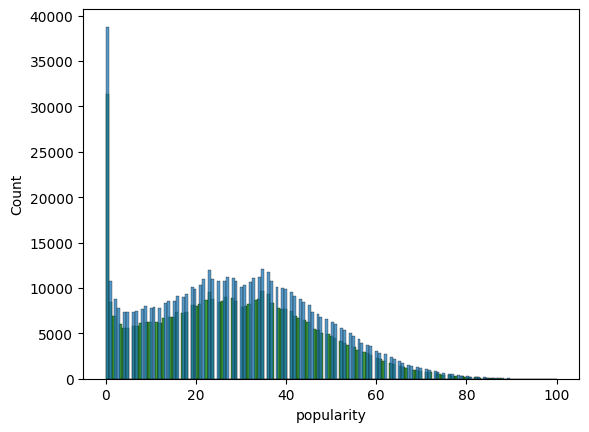

In [153]:
sns.histplot(x['popularity'], color='green'), sns.histplot(data['popularity'])

In [159]:
!pwd

/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/notebooks


In [154]:
x.to_csv('/home/mdbruchard/code/dmassonfr/Spotify_hit_predictor/raw_data/final_dataset_3.csv', index=False)

(447490, 24)